# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

# Load Data

In [71]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Information About Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Statistical information

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Check Missing Values

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Check Duplication Value

In [6]:
df.duplicated().sum()

18078

In [7]:
df.drop_duplicates(inplace=True)

# size of Data

In [8]:
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])

Number of Rows : 301717
Number of Columns : 18


In [9]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# See Categorical Features

In [10]:
cat_col = df.select_dtypes('O')
cat_col

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


# Visualize Categorical Features 

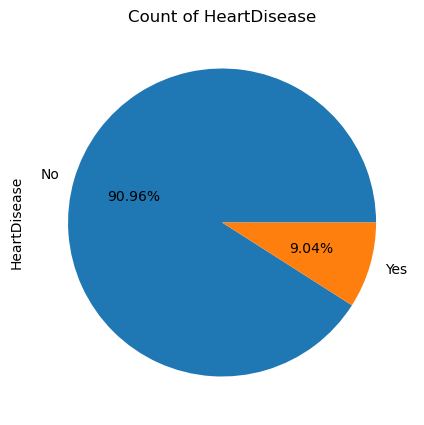

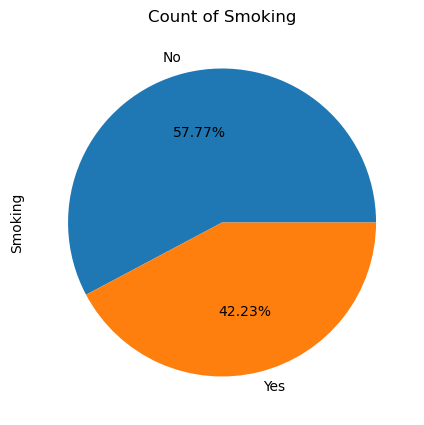

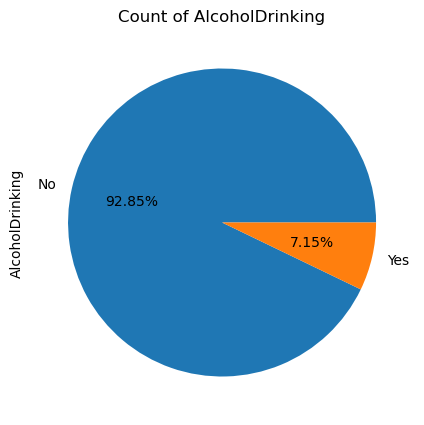

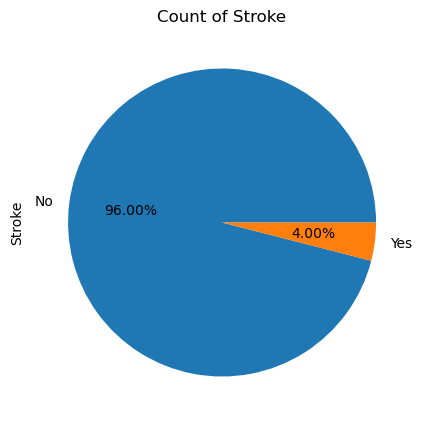

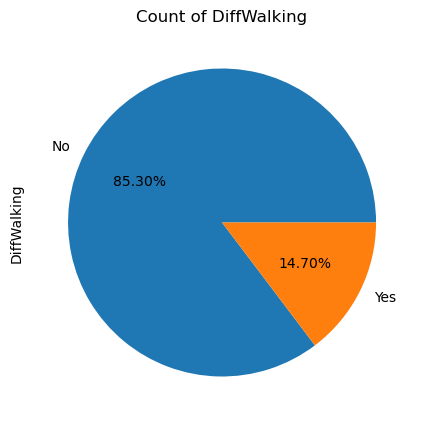

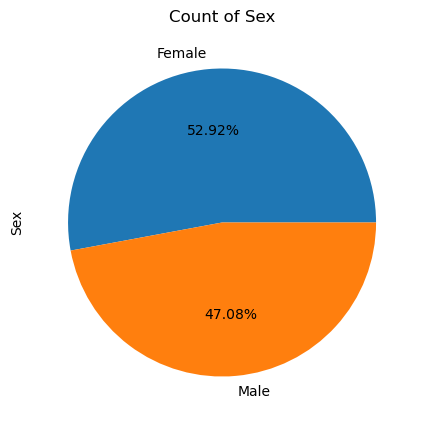

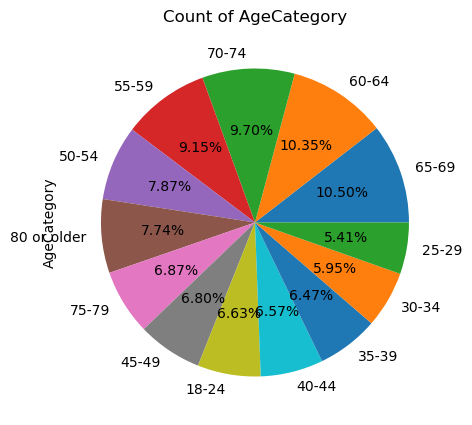

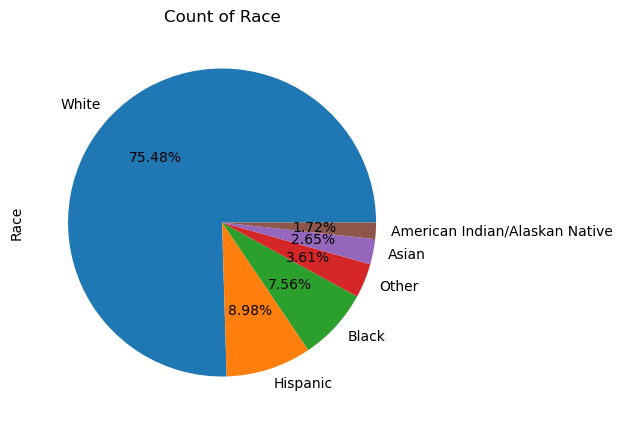

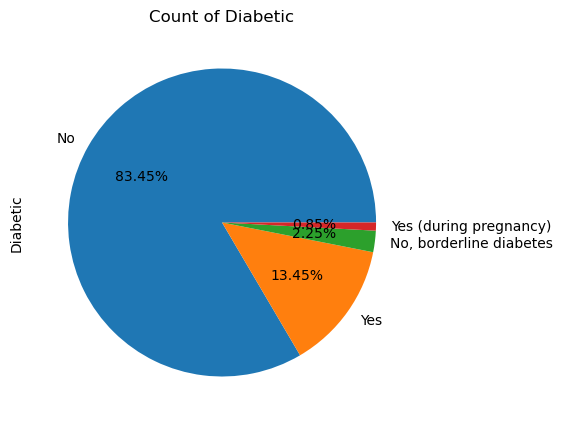

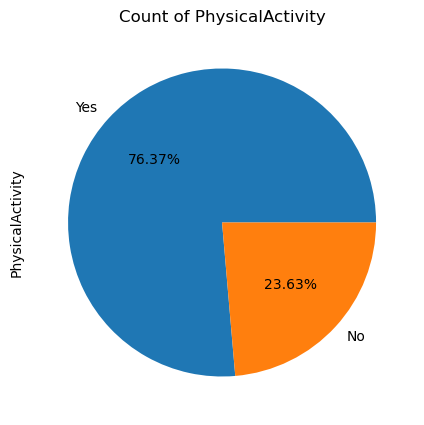

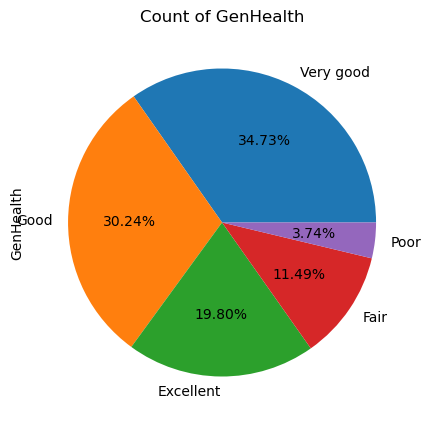

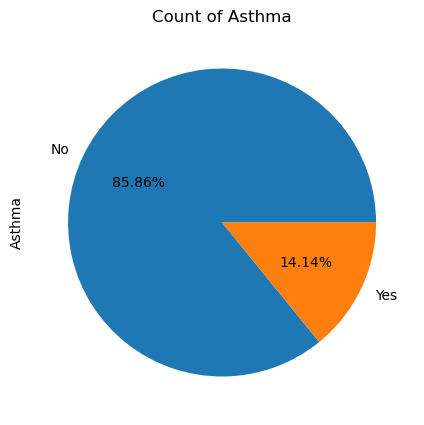

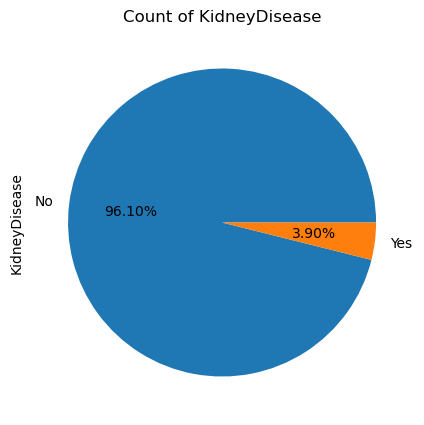

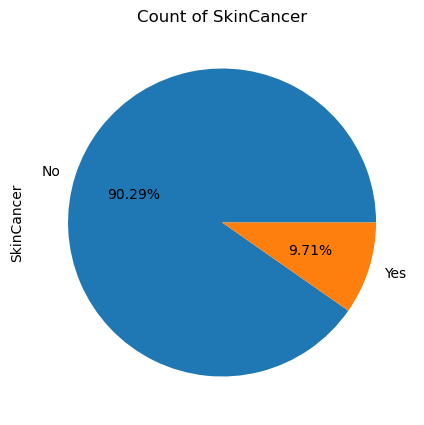

In [11]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot.pie(autopct='%.2f%%')    
    plt.title(f'Count of {col}')
    plt.show()

In [12]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [13]:
df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 'No')
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')

In [14]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

# Visualize Categorical Features Wtih Target

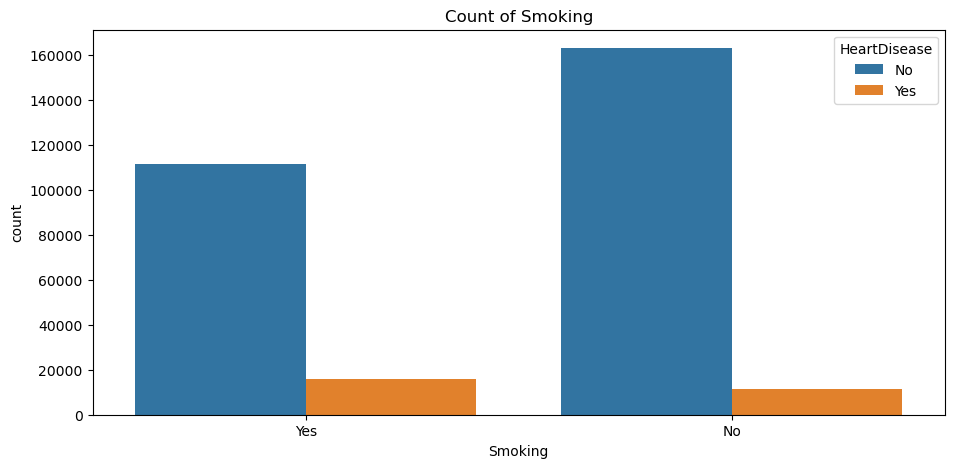

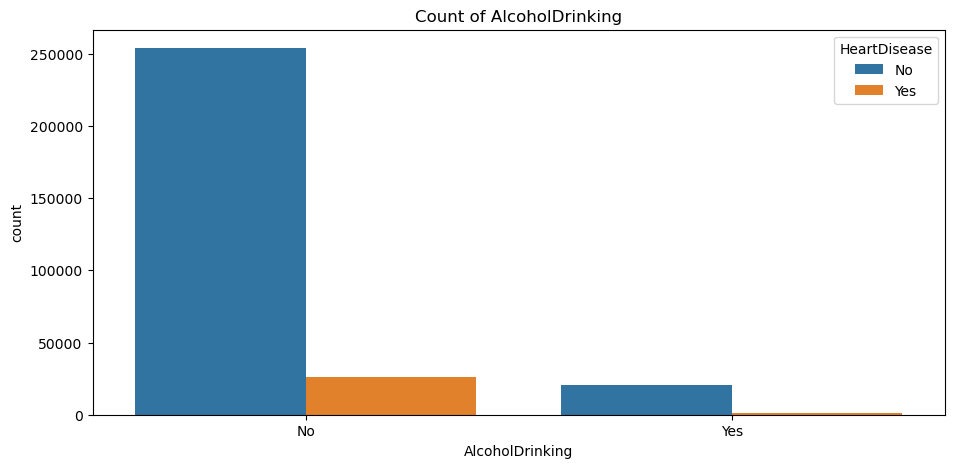

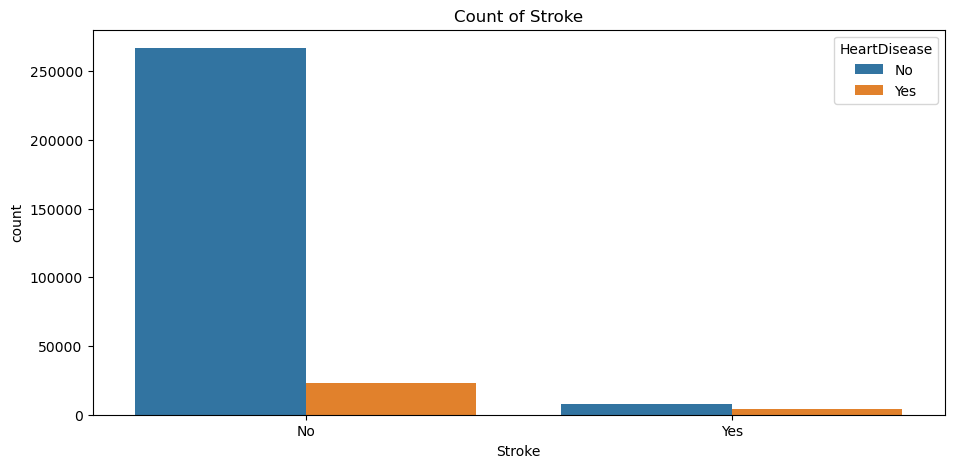

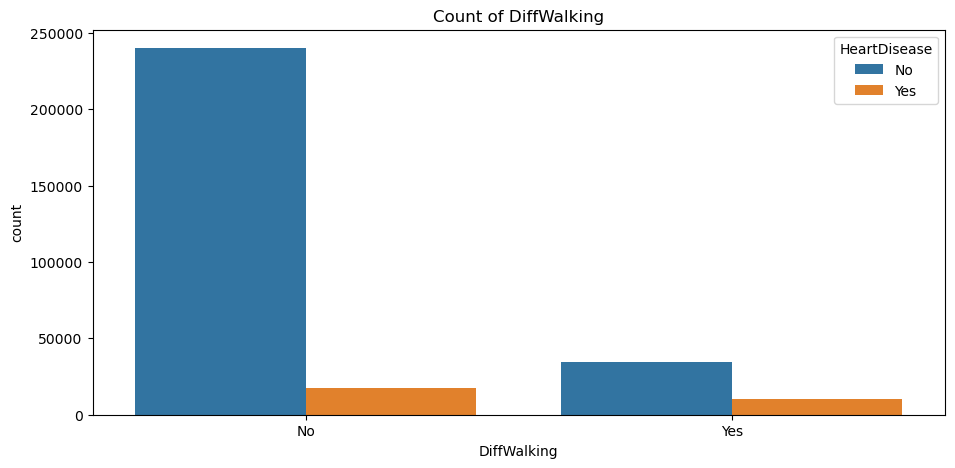

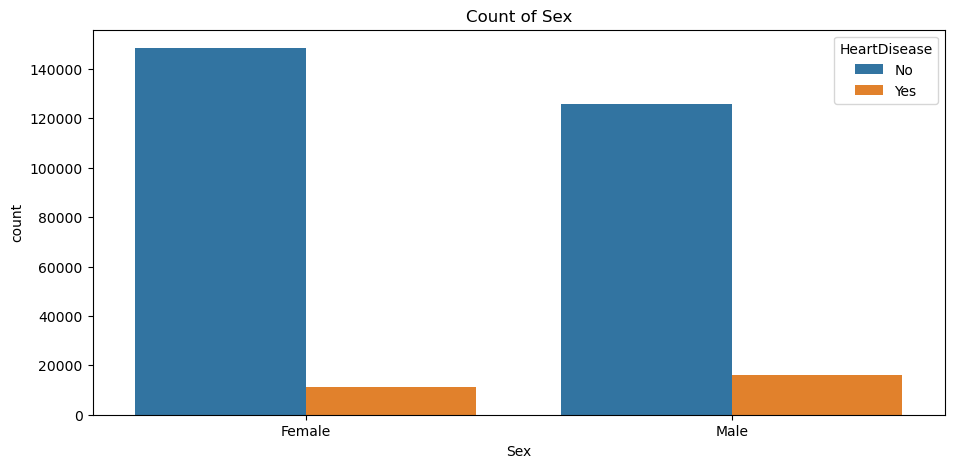

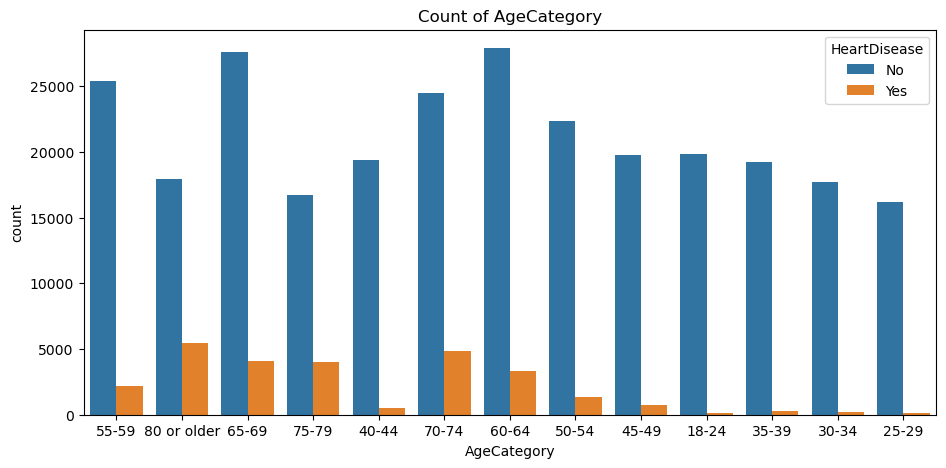

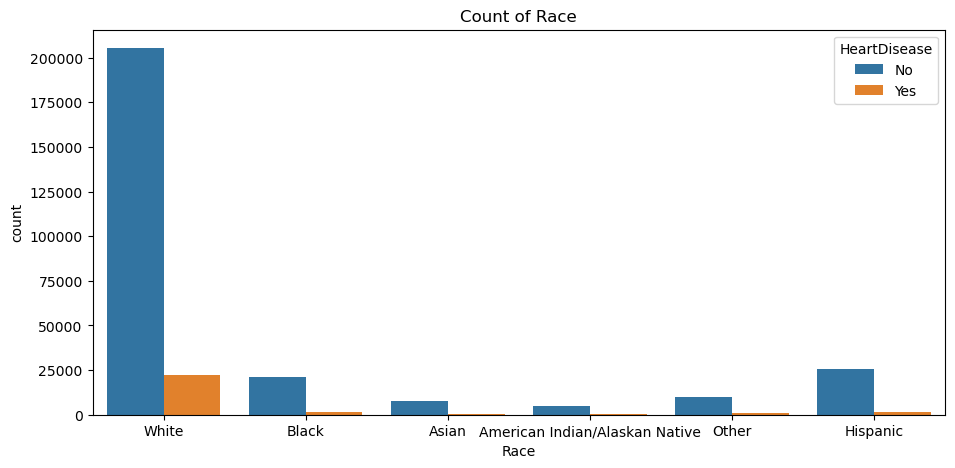

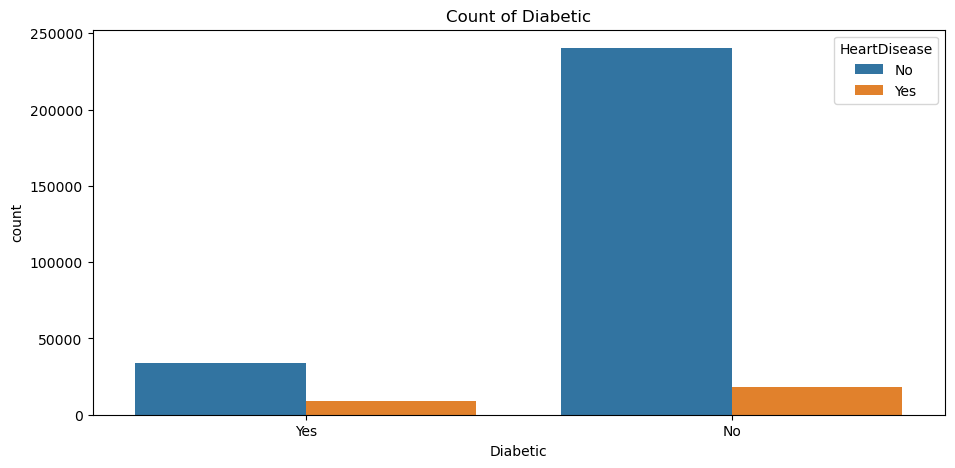

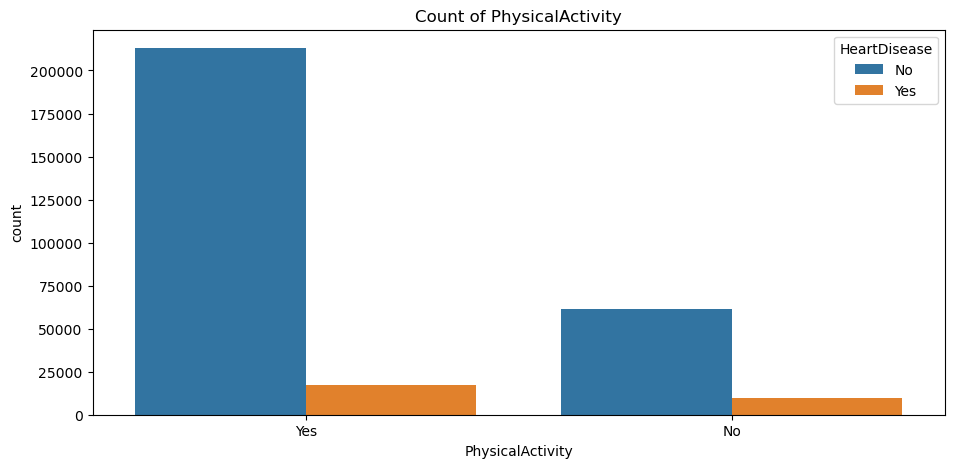

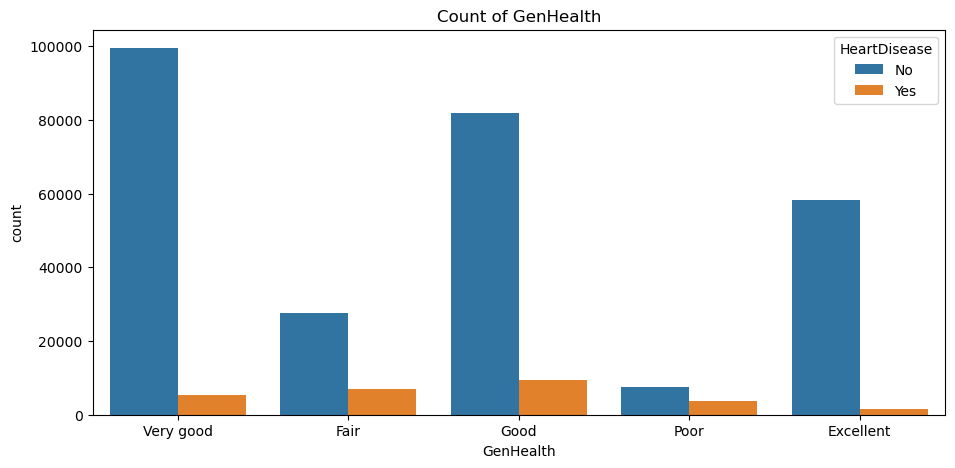

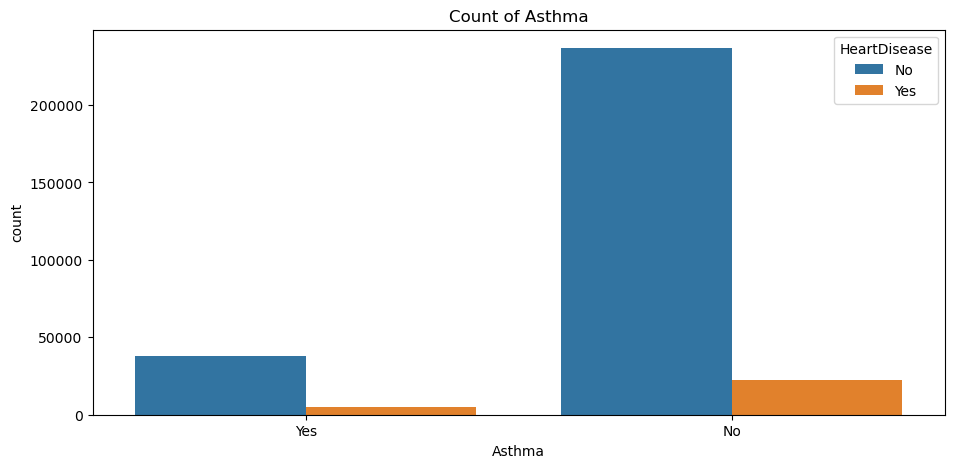

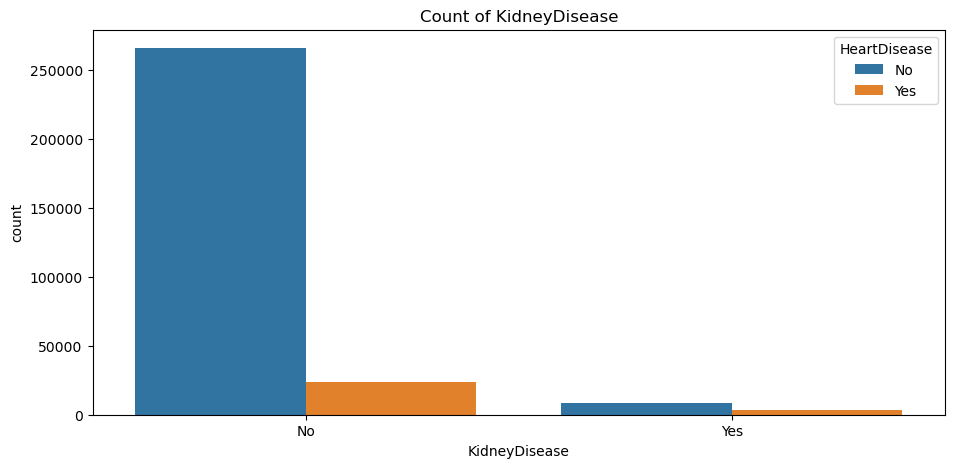

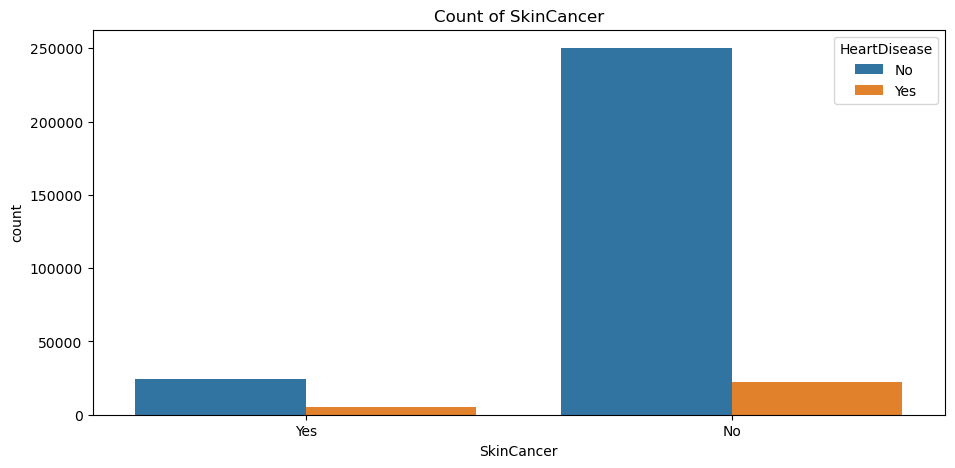

In [15]:
for col in cat_col:
    if col != 'HeartDisease' :
        plt.figure(figsize=(11,5))
        sns.countplot(x=df[col], hue=df['HeartDisease'])
        plt.title(f'Count of {col}')
    plt.show()

### Preproccessing

In [16]:
def bmi_change(x):
    if x < 18.5:
        return 'Underweight'
    elif x >= 18.5 and x < 25:
        return 'Normalweigt'
    elif x >= 25 and x < 30:
        return 'Overweight'
    else :
        return 'Obesity'
    
df['BMI'] = df['BMI'].apply(bmi_change)

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Underweight,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,Normalweigt,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,Overweight,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,Normalweigt,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,Normalweigt,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [18]:
df['BMI'].value_counts()

Overweight     105432
Obesity        100344
Normalweigt     90858
Underweight      5083
Name: BMI, dtype: int64

<Axes: xlabel='BMI', ylabel='count'>

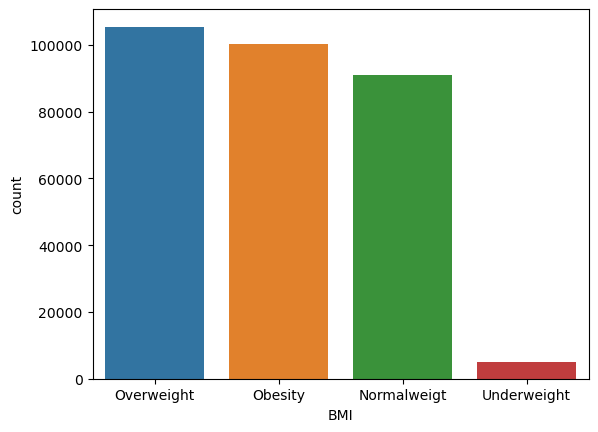

In [19]:
sns.countplot(x=df['BMI'], order=df['BMI'].value_counts().index)

# Encoding Data

In [30]:
df['HeartDisease']= df['HeartDisease'].map({'Yes':1, 'No':0})

In [31]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,Underweight,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,Normalweigt,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,Overweight,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,Normalweigt,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,Normalweigt,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [32]:
df.to_csv('new_data.csv', index=False)

In [33]:
df.columns[1:]

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [34]:
for col in df.columns[1:]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [35]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,3,1,0,0,3,30,0,0,7,5,1,1,4,4,1,0,1
1,0,0,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,2,1,0,0,20,30,0,1,9,5,1,1,1,7,1,0,0
3,0,0,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,0,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [36]:
df.shape

(301717, 18)

# Deal with Imbalanced classes . 
 
## Use SMOTE CLass Because it's Better . 

In [37]:
sm = SMOTE(random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('HeartDisease', axis=1), df['HeartDisease'])
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<Axes: ylabel='HeartDisease'>

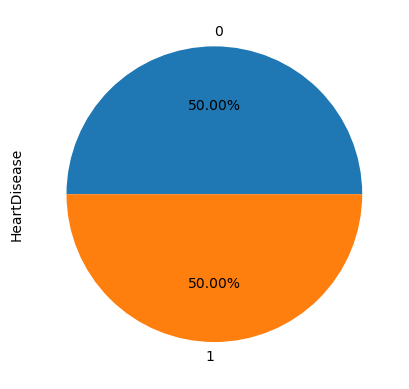

In [38]:
oversampled_Y.value_counts().plot.pie(autopct='%.2f%%')

# Split Data into Features and Target

In [39]:
x_train, x_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=.25, random_state=42)            

# Make scaling to make all values has one range .

In [40]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Now, After we finished our analysis ,we will build many techniques to train and predict then select best technique .

## LogisticRegression

In [43]:
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
y_pred_1 = clf1.predict(x_test)
print(f'Training Accuracy: {clf1.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_1)}')
print(classification_report(y_test, y_pred_1))
print(f'Testing Recall: {recall_score(y_test, y_pred_1)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_1)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_1)}')
print('-'*30)

Training Accuracy: 0.7282114437286851
Testing Accuracy: 0.7278689480280992
              precision    recall  f1-score   support

           0       0.75      0.69      0.72     68436
           1       0.71      0.77      0.74     68792

    accuracy                           0.73    137228
   macro avg       0.73      0.73      0.73    137228
weighted avg       0.73      0.73      0.73    137228

Testing Recall: 0.7668333527154321
Testing Precesion: 0.7123258074970292
Testing F-1: 0.7385752688172044
------------------------------


## Navie Bayes

In [44]:
clf2 = GaussianNB()
clf2.fit(x_train, y_train)
y_pred_2 = clf2.predict(x_test)
print(f'Training Accuracy: {clf2.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_2)}')
print(classification_report(y_test, y_pred_2))
print(f'Testing Recall: {recall_score(y_test, y_pred_2)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_2)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_2)}')
print('-'*30)

Training Accuracy: 0.6889143129196179
Testing Accuracy: 0.687170256798904
              precision    recall  f1-score   support

           0       0.68      0.71      0.69     68436
           1       0.70      0.66      0.68     68792

    accuracy                           0.69    137228
   macro avg       0.69      0.69      0.69    137228
weighted avg       0.69      0.69      0.69    137228

Testing Recall: 0.661632166530992
Testing Precesion: 0.6984363251338868
Testing F-1: 0.6795362760247539
------------------------------


## DecisionTree

In [45]:
clf4 = DecisionTreeClassifier()
clf4.fit(x_train, y_train) 
y_pred_4 = clf4.predict(x_test)
print(f'Training Accuracy: {clf4.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_4)}')
print(classification_report(y_test, y_pred_4))
print(f'Testing Recall: {recall_score(y_test, y_pred_4)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_4)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_4)}')
print('-'*30)

Training Accuracy: 0.9293122880656037
Testing Accuracy: 0.8425685720115428
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     68436
           1       0.81      0.89      0.85     68792

    accuracy                           0.84    137228
   macro avg       0.85      0.84      0.84    137228
weighted avg       0.85      0.84      0.84    137228

Testing Recall: 0.8927055471566461
Testing Precesion: 0.8119496522727874
Testing F-1: 0.8504147452674726
------------------------------


## RandomForest (bagging)

In [46]:
clf5 = RandomForestClassifier()
clf5.fit(x_train, y_train) 
y_pred_5 = clf5.predict(x_test)
print(f'Training Accuracy: {clf5.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_5)}')
print(classification_report(y_test, y_pred_5))
print(f'Testing Recall: {recall_score(y_test, y_pred_5)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_5)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_5)}')
print('-'*30)

Training Accuracy: 0.9293098590180818
Testing Accuracy: 0.8612236569796251
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     68436
           1       0.83      0.91      0.87     68792

    accuracy                           0.86    137228
   macro avg       0.86      0.86      0.86    137228
weighted avg       0.86      0.86      0.86    137228

Testing Recall: 0.9106146063495756
Testing Precesion: 0.829291217665281
Testing F-1: 0.8680523799625857
------------------------------


## XGboost (boosting)

In [47]:
clf6 = XGBClassifier()
clf6.fit(x_train, y_train) 
y_pred_6 = clf6.predict(x_test)
print(f'Training Accuracy: {clf6.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_6)}')
print(classification_report(y_test, y_pred_6))
print(f'Testing Recall: {recall_score(y_test, y_pred_6)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_6)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_6)}')
print('-'*30)

Training Accuracy: 0.7839605134034843
Testing Accuracy: 0.7787113417086892
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     68436
           1       0.76      0.82      0.79     68792

    accuracy                           0.78    137228
   macro avg       0.78      0.78      0.78    137228
weighted avg       0.78      0.78      0.78    137228

Testing Recall: 0.8245144784277242
Testing Precesion: 0.7561154435779511
Testing F-1: 0.7888350358466555
------------------------------


### RandomForest has a high precision, recall and accuraccy , but i will choose DecisionTreebecause RandomForest has a large size when i saved it, so we will choose this model to build web application...

In [48]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train) 
y_pred = clf4.predict(x_test)
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(f'Testing Recall: {recall_score(y_test, y_pred)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print('-'*30)

Training Accuracy: 0.9293122880656037
Testing Accuracy: 0.8425685720115428
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     68436
           1       0.81      0.89      0.85     68792

    accuracy                           0.84    137228
   macro avg       0.85      0.84      0.84    137228
weighted avg       0.85      0.84      0.84    137228

Testing Recall: 0.8927055471566461
Testing Precesion: 0.8119496522727874
Testing F-1: 0.8504147452674726
------------------------------


In [49]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).head(20)

,y_test,y_pred
374936,1,1
319916,1,1
56188,0,0
444156,1,1
170814,0,0
46835,1,1
111452,0,1
249172,0,0
440056,1,1
373478,1,1


### After Build Model , we need to save it to build web application

In [51]:
import joblib

In [52]:
joblib.dump(model, 'model.h5')    # save model

['model.h5']

In [53]:
joblib.dump(scaler, 'scaler.h5')  # save scaler

['scaler.h5']

In [54]:
oversampled_X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [55]:
len(oversampled_X.columns)

17

### Test Model

In [69]:
model = joblib.load('model.h5')

In [64]:
scaler = joblib.load('scaler.h5')

In [65]:
data= [2, 1, 1, 1, 10, 20, 1, 0, 2, 2, 1, 0, 3, 9, 0, 0, 0]
data_scaled = scaler.transform([data])
model = model.predict(data_scaled)

if model == 1:
    print('Patient has heart disease')
else:
    print("Patient hasn't heart disease")

Patient has heart disease


In [70]:
data= [1, 0, 1, 0, 14, 20, 1, 0, 5, 2, 1, 0, 3, 9, 0, 0, 0]
data_scaled = scaler.transform([data])
model = model.predict(data_scaled)

if model == 1:
    print('Patient has heart disease')
else:
    print("Patient hasn't heart disease")

Patient hasn't heart disease
